<a href="https://colab.research.google.com/github/davidriveraarbelaez/IA_Explorador/blob/main/Tema4_M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay
)
import matplotlib.pyplot as plt

# Importar el dataset house-prices-modified.csv
import pandas as pd

# Cargar el dataset
updated_dataset = pd.read_csv('house-prices-modified.csv')


In [2]:
# 1. Preparar los datos
# Seleccionamos características y etiquetas (puedes elegir 'PriceCategory' o 'BrickBinary')
X = updated_dataset[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers']]  # Características
y = updated_dataset['PriceCategory']  # Etiqueta (clasificación binaria)

# Convertir etiquetas categóricas en valores binarios
y = y.map({'Cheap': 0, 'Expensive': 1})

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3]:
# 2. Entrenar un modelo
# Usamos un clasificador simple: Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [4]:
# 3. Realizar predicciones
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilidades para curvas ROC

In [5]:
# 4. Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

In [6]:
# 5. Calcular otras métricas: F1 Score, Precisión, Recall
report = classification_report(y_test, y_pred, target_names=['Cheap', 'Expensive'])

In [7]:
# 6. Calcular y graficar la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

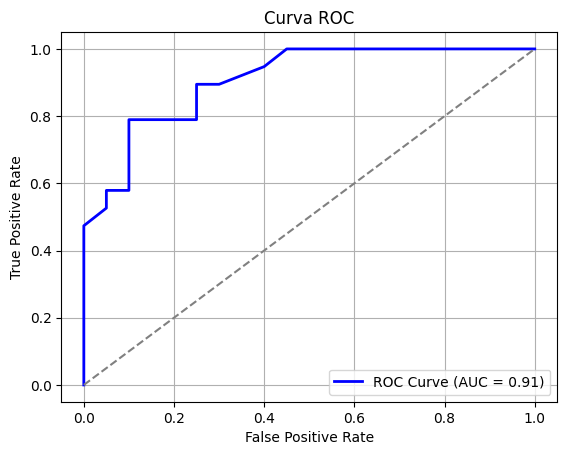

Matriz de Confusión:
[[18  2]
 [ 6 13]]

Reporte de Clasificación:
              precision    recall  f1-score   support

       Cheap       0.75      0.90      0.82        20
   Expensive       0.87      0.68      0.76        19

    accuracy                           0.79        39
   macro avg       0.81      0.79      0.79        39
weighted avg       0.81      0.79      0.79        39



In [ ]:
# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.grid()
plt.show()

# Resultados
print("Matriz de Confusión:")
print(cm)
print("\nReporte de Clasificación:")
print(report)